<a href="https://colab.research.google.com/github/nupoor-ka/ES114-PSDV/blob/main/Expectation_PMF_CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PART (A)

###IMPORTING RELEVANT LIBRARIES

In [ ]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

###TAKING INPUT

In [ ]:
print('Enter range of values as an array of space-separated numbers')
x = np.array(list(map(float, (input('Enter range of values for x: ')).split())))
y = np.array(list(map(float, (input('Enter range of values for y: ')).split())))
print(x)
print(y)
np.sort(x)
np.sort(y)
jpmf = np.empty((len(x), len(y)))
mx = np.zeros((len(x),))
my = np.zeros((len(y),))
print('Enter joint PMF values')
for i in range(len(x)):
  for j in range(len(y)):
    p = float(input('P({} and {}) = '.format(x[i], y[j])))
    jpmf[i][j] = p
    mx[i] += p
    my[j] += p

Enter range of values as an array of space-separated numbers
Enter range of values for x: 0 1 2 3
Enter range of values for y: 0 1 2
[0. 1. 2. 3.]
[0. 1. 2.]
Enter joint PMF values
P(0.0 and 0.0) = 0.1666666667
P(0.0 and 1.0) = 0.2222222222
P(0.0 and 2.0) = 0.02777777778
P(1.0 and 0.0) = 0.3333333333
P(1.0 and 1.0) = 0.1666666667
P(1.0 and 2.0) = 0
P(2.0 and 0.0) = 0.08333333333
P(2.0 and 1.0) = 0
P(2.0 and 2.0) = 0
P(3.0 and 0.0) = 0
P(3.0 and 1.0) = 0
P(3.0 and 2.0) = 0


###CHECKING VALIDITY OF PMF

The PMF values input are valid if the sum of probabilities of all points is 1.

In [ ]:
cdf = np.cumsum(jpmf)
cdf = cdf.reshape((len(x), len(y)))
if round(cdf[len(x)-1, len(y)-1], 8) != 1.0:
  print('Invalid PMF')
else:
  print('Valid PMF')

Valid PMF


###CHECKING DEPENDENCE OF VARIABLES

The variables $x$ and $y$ are independent if for any $x_i$ and $y_i$, $P_x,_y[x_i, y_i] = P_x[x_i]P_y[y_i]$

In [ ]:
indie = True
for i in range(len(x)):
  for j in range(len(y)):
    if mx[i]*my[j] != jpmf[i][j]:
      indie = False
      break
if indie:
  print('The two variables x and y are independent.')
else:
  print('The two variables x and y are dependent.')

The two variables x and y are dependent.


##PART (B)

###PLOTTING JOINT PMF AND JOINT CDF

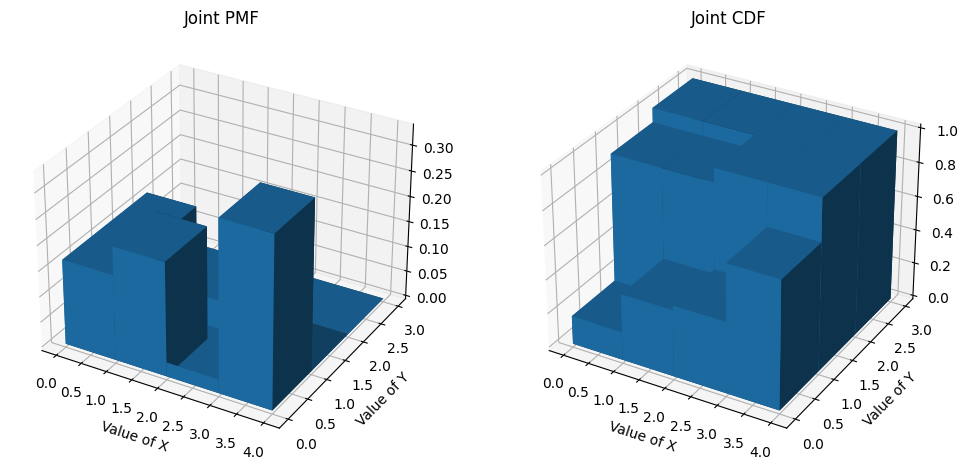

In [ ]:
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
xx = np.ravel(X)
yy = np.ravel(Y)
jj = jpmf.ravel()
bo = np.zeros_like(jj)
ax1.bar3d(xx, yy, bo, 1, 1, jj, shade = True)
ax1.set_title('Joint PMF')
ax1.set_xlabel('Value of X')
ax1.set_ylabel('Value of Y')
cc = cdf.ravel()
ax2.bar3d(xx, yy, bo, 1, 1, cc, shade = True)
ax2.set_title('Joint CDF')
ax2.set_xlabel('Value of X')
ax2.set_ylabel('Value of Y')
plt.show()

###PLOTTING MARGINAL PMF

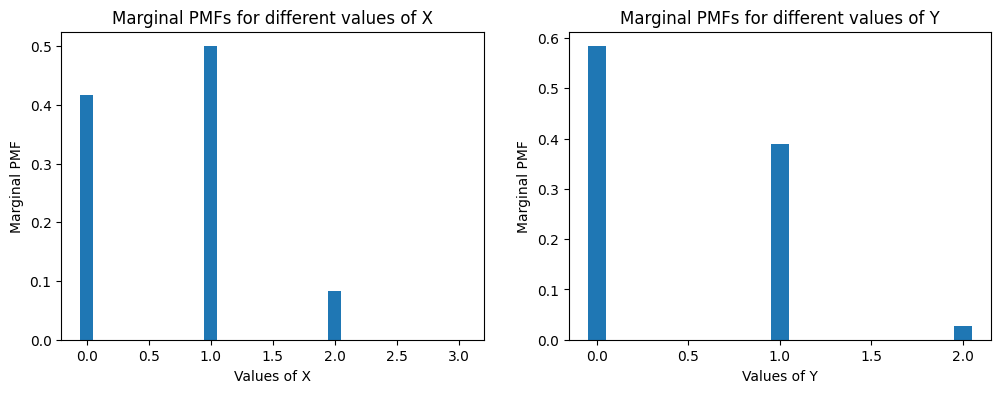

In [ ]:
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
ax[0].bar(x, mx, width = 0.1)
ax[0].set_xlabel('Values of X')
ax[0].set_ylabel('Marginal PMF')
ax[0].set_title('Marginal PMFs for different values of X')
ax[1].bar(y, my, width = 0.1)
ax[1].set_xlabel('Values of Y')
ax[1].set_ylabel('Marginal PMF')
ax[1].set_title('Marginal PMFs for different values of Y')
plt.show()

###PLOTTING MARGINAL CDF

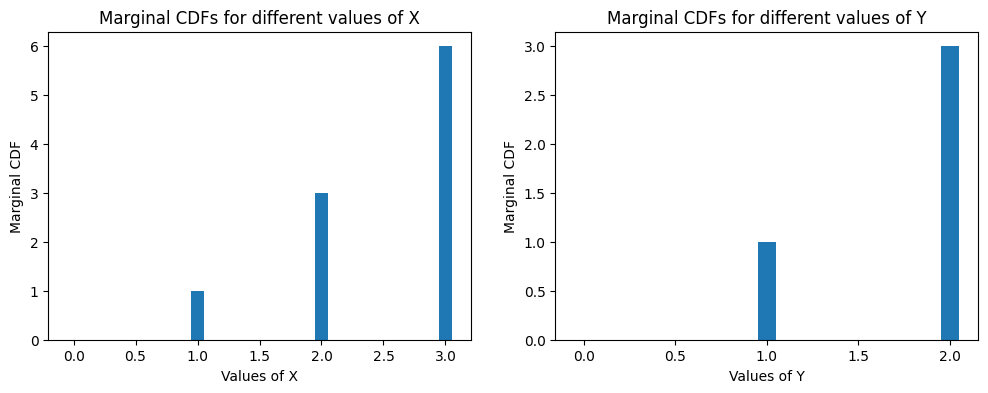

In [ ]:
mxc = np.zeros(x.shape)
myc = np.zeros(y.shape)
for i in range(len(x)):
  for j in range(i, len(x)):
    mxc[j]+=x[i]
for i in range(len(y)):
  for j in range(i, len(y)):
    myc[j]+=y[i]
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
ax[0].bar(x, mxc, width = 0.1)
ax[0].set_xlabel('Values of X')
ax[0].set_ylabel('Marginal CDF')
ax[0].set_title('Marginal CDFs for different values of X')
ax[1].bar(y, myc, width = 0.1)
ax[1].set_xlabel('Values of Y')
ax[1].set_ylabel('Marginal CDF')
ax[1].set_title('Marginal CDFs for different values of Y')
plt.show()

##PART (C)

Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].

In [ ]:
exy = 0
ex = 0
ey = 0
for i in range(len(x)):
  ex += (mx[i]*x[i])
  for j in range(len(y)):
    exy += (x[i]*y[j]*jpmf[i][j])
for i in range(len(y)):
  ey += (y[i]*my[i])
print('E[XY] =', exy)
print('E[X] =', ex)
print('E[Y] =', ey)
ex1y1 = 0
x1 = x - ex
y1 = y - ey
for i in range(len(x)):
  for j in range(len(y)):
    ex1y1 += (x1[i]*y1[j]*jpmf[i][j])
print('E[X1Y1] =', ex1y1)

E[XY] = 0.1666666667
E[X] = 0.66666666666
E[Y] = 0.44444444446
E[X1Y1] = -0.12962962960074073
